# find regions where trades are within a certain band

In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter 
tickerpair="BTCUSDT"
interval="30m"
intervals=['1m','3m','5m','15m','30m','1h','2h','3h','4h','6h','8h','12h','1d','3d','1w','1Month']
years=sorted(set([g.split("_")[2] for g in glob(f"kline_data\\{tickerpair}/*")]))

df = [pd.read_csv(g) for g in sorted(glob(f"kline_data_sample\\{tickerpair}/*")) if f"_{interval}.csv" in g]
df = pd.concat(df, ignore_index=True).drop_duplicates().reset_index(drop=True)

dfmpl=df[["open_time","open","high","low","close","volume"]]
dfmpl = dfmpl.rename(columns={"open_time":"Date","open":"Open","high":"High","low":"Low","close":"Close","volume":"Volume"})
dfmpl=dfmpl.set_index("Date")
dfmpl.index = pd.to_datetime(dfmpl.index,unit="ms")
print(len(dfmpl))
dfmpl=dfmpl.iloc[-500:]

93105


In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/alexpvpmindustry/cryptotradr/main/kline_data_sample/BTCUSDT/BTCUSDT_2018_1d.csv')

In [3]:
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1514736000000,13226.16,13860.00,13192.02,13660.00,622.270179,1514737799999,8.477208e+06,6512,336.776441,4.584563e+06,0
1,1514737800000,13650.00,14030.00,13640.10,13836.00,525.938039,1514739599999,7.302146e+06,5384,290.765216,4.036952e+06,0
2,1514739600000,13831.01,13850.00,13641.01,13786.99,440.402799,1514741399999,6.064167e+06,4180,215.635454,2.970558e+06,0
3,1514741400000,13799.77,13924.60,13730.00,13762.99,253.403143,1514743199999,3.498425e+06,2822,129.948700,1.795395e+06,0
4,1514743200000,13776.02,13950.00,13762.99,13813.06,198.203602,1514744999999,2.744211e+06,2308,100.752193,1.395923e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93100,1682784000000,29271.21,29300.00,29244.88,29265.23,306.046600,1682785799999,8.958538e+06,11350,147.346180,4.313057e+06,0
93101,1682785800000,29265.24,29286.88,29256.45,29281.78,300.506790,1682787599999,8.796621e+06,10043,154.104090,4.511088e+06,0
93102,1682787600000,29281.78,29281.78,29241.04,29241.04,384.422110,1682789399999,1.124938e+07,10027,176.592240,5.167510e+06,0
93103,1682789400000,29241.05,29241.05,29031.00,29155.24,1328.031240,1682791199999,3.867006e+07,32109,614.115670,1.787908e+07,0


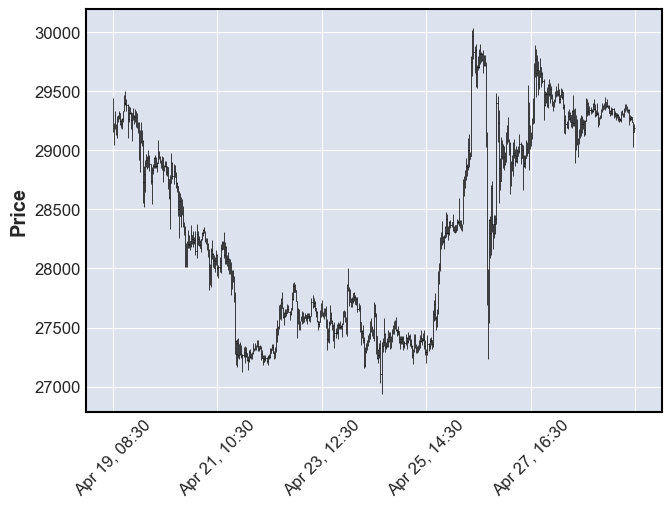

In [4]:
mpf.plot(dfmpl,type="ohlc")

In [5]:
sel = (df.high<df.high.rolling(10).max()*1.02) & (df.low> df.high.rolling(10).min()*0.98)
sel = (sel.rolling(10).sum()==10)
high= df.high.rolling(10).max()[sel]
low = df.low.rolling(10).min()[sel]

In [6]:
lastSlice=-500
alines = []
#newline=False
#temp_aline = []
#for s,h,l,d in zip(sel.iloc[lastSlice:],high.iloc[lastSlice:],low.iloc[lastSlice:],dfmpl.index):
    

In [7]:
import numpy as np

def get_consecutive_true_indices(arr): 
    if type(arr) != np.ndarray:
        arr = np.array(arr) 
    arr = np.concatenate([[False], arr, [False]]) 
    diffs = np.diff(arr.astype(int)) 
    starts = np.where(diffs == 1)[0]
    ends = np.where(diffs == -1)[0] - 1 
    return list(zip(starts, ends))

arr = np.array([False, True, True, False, True, True, True, False, False, True])
print(get_consecutive_true_indices(arr))


[(1, 2), (4, 6), (9, 9)]


In [8]:
sel.iloc[lastSlice:][5:15]

92610    False
92611    False
92612    False
92613    False
92614     True
92615     True
92616     True
92617     True
92618     True
92619     True
dtype: bool

In [9]:
get_consecutive_true_indices(sel.iloc[lastSlice:])

[(9, 356), (369, 499)]

In [10]:
dates = [ (d,h) for d,h,l,s in zip(dfmpl.index,dfmpl.High,dfmpl.Low,sel.iloc[lastSlice:]) if s]

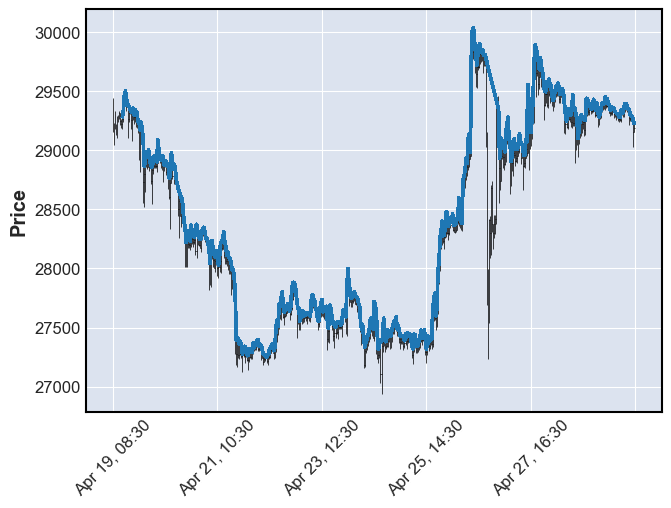

In [11]:
mpf.plot(dfmpl,alines=[dates])

In [12]:
dfmpl

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-19 08:30:00,29283.85,29440.42,29154.65,29168.47,8961.29025
2023-04-19 09:00:00,29168.47,29231.49,29040.00,29218.22,3871.44258
2023-04-19 09:30:00,29218.22,29327.21,29182.17,29200.57,1733.10910
2023-04-19 10:00:00,29200.58,29224.33,29124.36,29195.35,1444.87027
2023-04-19 10:30:00,29195.35,29286.64,29100.00,29257.26,2339.30322
...,...,...,...,...,...
2023-04-29 16:00:00,29271.21,29300.00,29244.88,29265.23,306.04660
2023-04-29 16:30:00,29265.24,29286.88,29256.45,29281.78,300.50679
2023-04-29 17:00:00,29281.78,29281.78,29241.04,29241.04,384.42211


In [13]:
def find_consolidation_regions(kline_df, window=15, threshold=0.02):
    """
    kline_df: DataFrame with 'High', 'Low' prices.
    window: Number of periods to consider for consolidation detection.
    threshold: Maximum allowed relative difference in price in consolidation.
    """
    # High / Low price
    high = kline_df['High']
    low = kline_df['Low']

    # Compute the relative difference
    #rel_diff = (high - low) / ((high + low) / 2)
    
    # Find periods of consolidation
    #consolidation = rel_diff.rolling(window).max() < threshold
    
    dh = kline_df['High']
    dl = kline_df['Low']
    consolidation = (dh<dh.rolling(window).max()*(1+threshold)) & (dl> dl.rolling(window).min()*(1-threshold))
    
    #print(consolidation)
    # Convert to numpy array for index calculation
    consolidation = np.array(consolidation)
    
    # Compute the differences between successive elements
    arr = np.concatenate([[False], consolidation, [False]])
    diffs = np.diff(arr.astype(int)) 
    # Get start and end indices
    starts = np.where(diffs == 1)[0]
    ends = np.where(diffs == -1)[0] - 1
    #print(starts,ends)
    return list(zip(starts, ends))

In [14]:
# conda install -c conda-forge ta-lib -y

In [15]:
# def find_consolidation_regions(kline_df, window=15, threshold=0.02, tolerance=0.01):
#     """
#     kline_df: DataFrame with 'High', 'Low' prices.
#     window: Number of periods to consider for consolidation detection.
#     threshold: Maximum allowed relative difference in price in consolidation.
#     tolerance: Maximum allowed difference for a price to be considered "close" to the max.
#     """
#     high = kline_df['High']
#     low = kline_df['Low']

#     # Compute the relative difference
#     rel_diff = (high - low) / ((high + low) / 2)

#     # Compute maximum high in each window
#     rolling_max = high.rolling(window).max() 
#     rolling_min = low.rolling(window).min()

#     # Find periods of consolidation
#     consolidation = rel_diff.rolling(window).max() < threshold

#     # Check that the high price came close to the max at least twice in each window
#     close_to_max = np.abs(high - rolling_max) < tolerance*rolling_max
#     at_least_two = close_to_max.rolling(window).sum() >= 2
    
#     near_limit=3
#     # Check that the high price is near the start or end of the window
#     close_to_edge = np.concatenate([
#         [True] * near_limit,
#         [False] * (window - 2 * near_limit),
#         [True] * near_limit
#     ])
#     near_start_or_end = close_to_max.rolling(window).apply(lambda x: np.any(x & close_to_edge), raw=True) >= 1

#     # Both conditions must be met for a consolidation period
#     #consolidation = consolidation & near_start_or_end
    
#     close_to_min = np.abs(low - rolling_min) <  tolerance*rolling_min
#     at_least_two2 = close_to_min.rolling(window).sum() >= 2

#     # Both conditions must be met for a consolidation period
#     consolidation = consolidation & near_start_or_end & at_least_two2

#     # Convert to numpy array for index calculation
#     consolidation = np.array(consolidation)
    
#     # Compute the differences between successive elements
#     diffs = np.diff(np.concatenate([[False], consolidation, [False]]).astype(int))

#     # Get start and end indices
#     starts = np.where(diffs == 1)[0]
#     ends = np.where(diffs == -1)[0] - 1

#     return list(zip(starts, ends))

# # Assume we have kline_df as a pandas DataFrame
# # find_consolidation_regions(kline_df)


In [16]:
# con_ind = find_consolidation_regions(dfmpl,threshold=0.15, tolerance=0.01)
# con_ind

In [17]:
# dates = []
# colors=[]
# for start,end in con_ind:
#     high = dfmpl.iloc[start:end].High.max()
#     low = dfmpl.iloc[start:end].Low.min()
#     dates.append(((dfmpl.index[start],high),(dfmpl.index[end],high)))
#     dates.append(((dfmpl.index[start],low),(dfmpl.index[end],low)))
#     colors.append("g")
#     colors.append("r")
# mpf.plot(dfmpl,alines=dict(alines=dates,colors=colors))

In [18]:
dfmpl.index[14]

Timestamp('2023-04-19 15:30:00')

In [19]:
window = dfmpl.iloc[15:30]

In [20]:
threshold=0.01
min_touches = 2
max_touches = 4
near_limit = 4
window_size=15

window = dfmpl.iloc[15:15+window_size]
def is_consolidation(window,
                    threshold=0.01,
min_touches = 2,
max_touches = 4,
near_limit = 4,
window_size=15):
    touch_resistance = window.High > (window.High.max()*(1-threshold))
    if sum(touch_resistance)< min_touches or sum(touch_resistance)> max_touches :
        return False
    touch_support = window.Low > (window.Low.max()*(1-threshold))
    if sum(touch_support)< min_touches or sum(touch_support)> max_touches :
        return False
    touches1 = np.where(touch_resistance)[0]
    touches2 = np.where(touch_support)[0]
    if touches1[0]>near_limit and touches1[-1]< (window_size-near_limit):
        if touches2[0]>near_limit and touches2[-1]< (window_size-near_limit):
            return False # should be close to start or end
    return True


In [21]:
%%time
indexes=[]
#previ = 0
for i in range(500-window_size):
    window = dfmpl.iloc[i:i+window_size]
    if is_consolidation(window):
        #print(i)
        #if previ +1 != i:
        indexes.append(i)
        #    previ = i
indexes = np.asarray(indexes)[np.where(np.diff(np.concatenate([[0],np.asarray(indexes)]))>1)[0]]

CPU times: total: 125 ms
Wall time: 161 ms


In [22]:
indexes

array([114, 211, 298, 323, 331, 354, 357, 391])

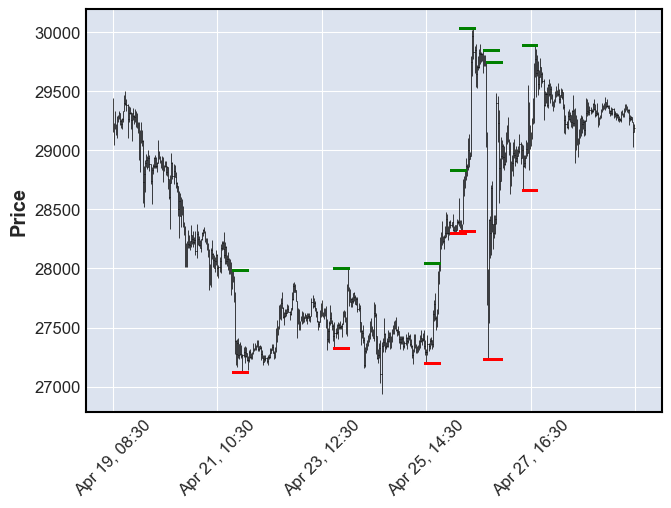

In [23]:
dates = []
colors=[]
for start in indexes:
    end = start+window_size
    high = dfmpl.iloc[start:end].High.max()
    low = dfmpl.iloc[start:end].Low.min()
    dates.append(((dfmpl.index[start],high),(dfmpl.index[end],high)))
    dates.append(((dfmpl.index[start],low),(dfmpl.index[end],low)))
    colors.append("g")
    colors.append("r")
mpf.plot(dfmpl,alines=dict(alines=dates,colors=colors))

# using TA lib

In [24]:
import talib as ta

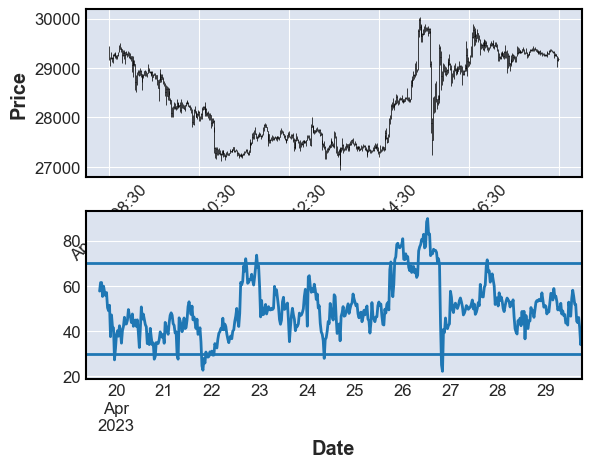

In [25]:
fig,axx=plt.subplots(2,1)
ax=axx[0]
mpf.plot(dfmpl,ax=ax)
ax=axx[1]
ta.RSI(dfmpl.Close).plot(ax=ax)
ax.axhline(30)
ax.axhline(70)

In [118]:
np.diff((ta.RSI(dfmpl.Close)>50)*1,1)[12:30]

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,  0,  0,  0,  0,
        0])

In [119]:
np.diff((ta.RSI(dfmpl.Close)>50),1)[12:30]

array([False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False])

In [110]:
crossings = np.where(np.diff(ta.RSI(dfmpl.Close)>50,1))[0]
scatter = [ dfmpl.Close.iloc[i]*1.02 if i in crossings else np.nan for i in np.arange(len(dfmpl.Close))]
vlines = [dfmpl.index[i] for i in np.arange(len(dfmpl.Close)) if i in crossings ]
my_vlines=[i for i in np.arange(len(dfmpl.Close)) if i in crossings ]

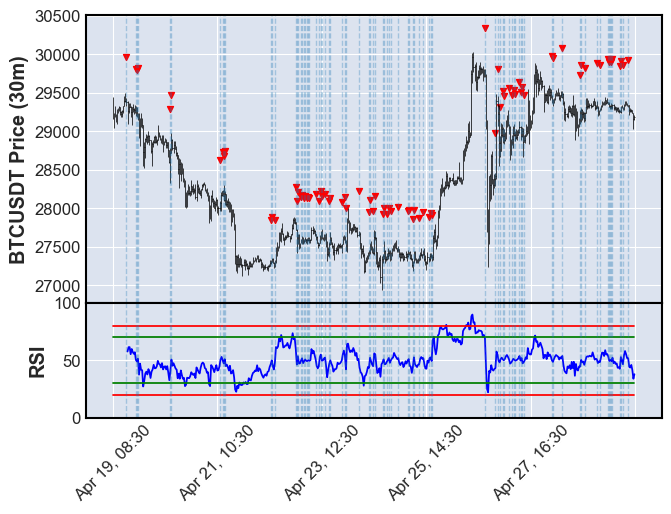

In [109]:
RSI_close = ta.RSI(dfmpl.Close)
apds = [ #mpf.make_addplot(slo,type='scatter',markersize=200,marker='^'),
    mpf.make_addplot(RSI_close,panel=1,color='b',type='line',ylim=(0,100),ylabel="RSI"),
    mpf.make_addplot(dfmpl.Close*0+70,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+30,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+80,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+20,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(scatter,color='r',type='scatter',marker="v"),
    #mpf.make_addplot(vlines,color='r',type='vline'),
       ]
fig, axlist =mpf.plot(dfmpl,addplot=apds,ylabel=f"{tickerpair} Price ({interval})",
        #vlines=dict(vlines=vlines,linewidths=0.01,alpha=0.3,colors="r"),
         returnfig=True)#,panel_ratios=(1,1),figratio=(1,1),figscale=1.5)
for ax in axlist[:]:
    for vline in my_vlines:
        ax.axvline(x=vline, linestyle='--',linewidth=1,alpha=0.3)
mpf.show()